In [9]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
# import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord
import math

sys.path.append('C:/gaiaenv/New Py/My_thesis/Modules')
from mock_wake import generate_mock_wake
from rotation_funcs import rotate, angle_finder
from misc import plot_OD_gaussian


In [ ]:
fpath = 'C:/Data/Praktika_data/star_particles_pos_5e8.npy'
data = np.load(fpath)
stars_pos_data = pd.DataFrame(data)
stars_pos_data = stars_pos_data.rename(columns={0:"x", 1:"y", 2:"z"})


stars_pos_data["z"] = pd.to_numeric(stars_pos_data["z"], errors="coerce")
stars_pos_data['z'] = np.where((stars_pos_data['z'] > 20) | (stars_pos_data['z'] < -20), np.nan, stars_pos_data['z'])
stars = stars_pos_data.dropna(subset=["z"])

x = stars['x']
y = stars['y']
z = stars['z']

pos = np.array([x, y, z])


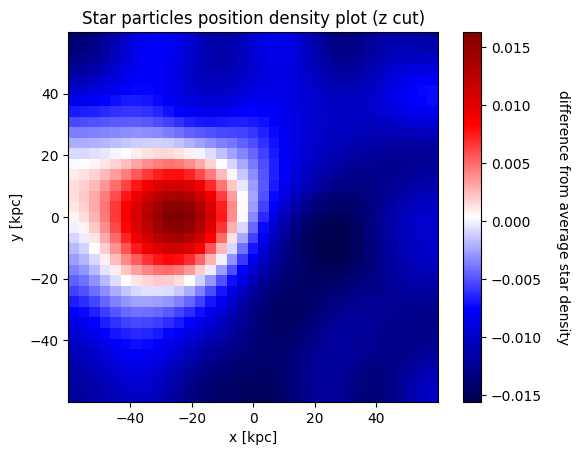

In [14]:
bins = (35, 35)
plot_OD_gaussian(x, y, bins, 3, 'Star particles position density plot (z cut)', 'x [kpc]', 'y [kpc]')

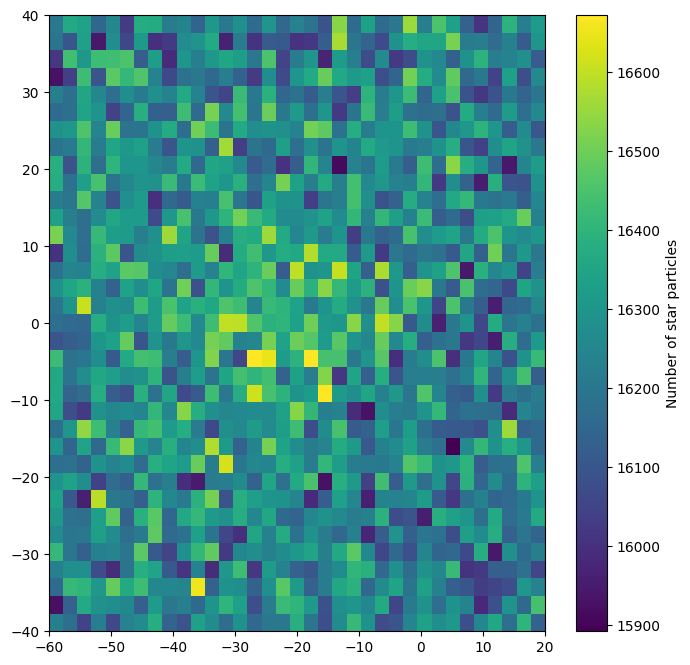

In [17]:
plt.figure(figsize=(8,8))
plt.hist2d(x, y, bins=bins, range=[[-60, 20], [-40, 40]], cmap=cm.viridis)
plt.colorbar(label='Number of star particles')